In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import exploring_script as es
import importlib
importlib.reload(es)
import matplotlib.pyplot as plt

In [4]:
confirmed_sso = es.load_data(["ssnamenr"])

In [5]:
len(confirmed_sso["ssnamenr"].unique())

517611

In [6]:
sso_name = confirmed_sso["ssnamenr"].unique()


In [7]:
mpc_ast_data = pd.read_parquet(
    "../data/MPC_Database/mpcorb_extended.parquet",
    columns=["Number", "Name", "Principal_desig", "Other_desigs", "a", "e", "i", "Node", "Peri", "M", "Epoch", "Orbit_type"]
)

mpc_comet_data = pd.read_parquet("../data/MPC_Database/cometels.parquet")

In [8]:
mpc_in_fink, fink_not_in_mpc = es.mpc_crossmatch(mpc_ast_data, pd.Series(confirmed_sso["ssnamenr"].unique()))

In [9]:
len(fink_not_in_mpc)

9115

In [10]:
len(mpc_in_fink) + len(fink_not_in_mpc), len(confirmed_sso["ssnamenr"].unique())

(513571, 517611)

## Eccentricity

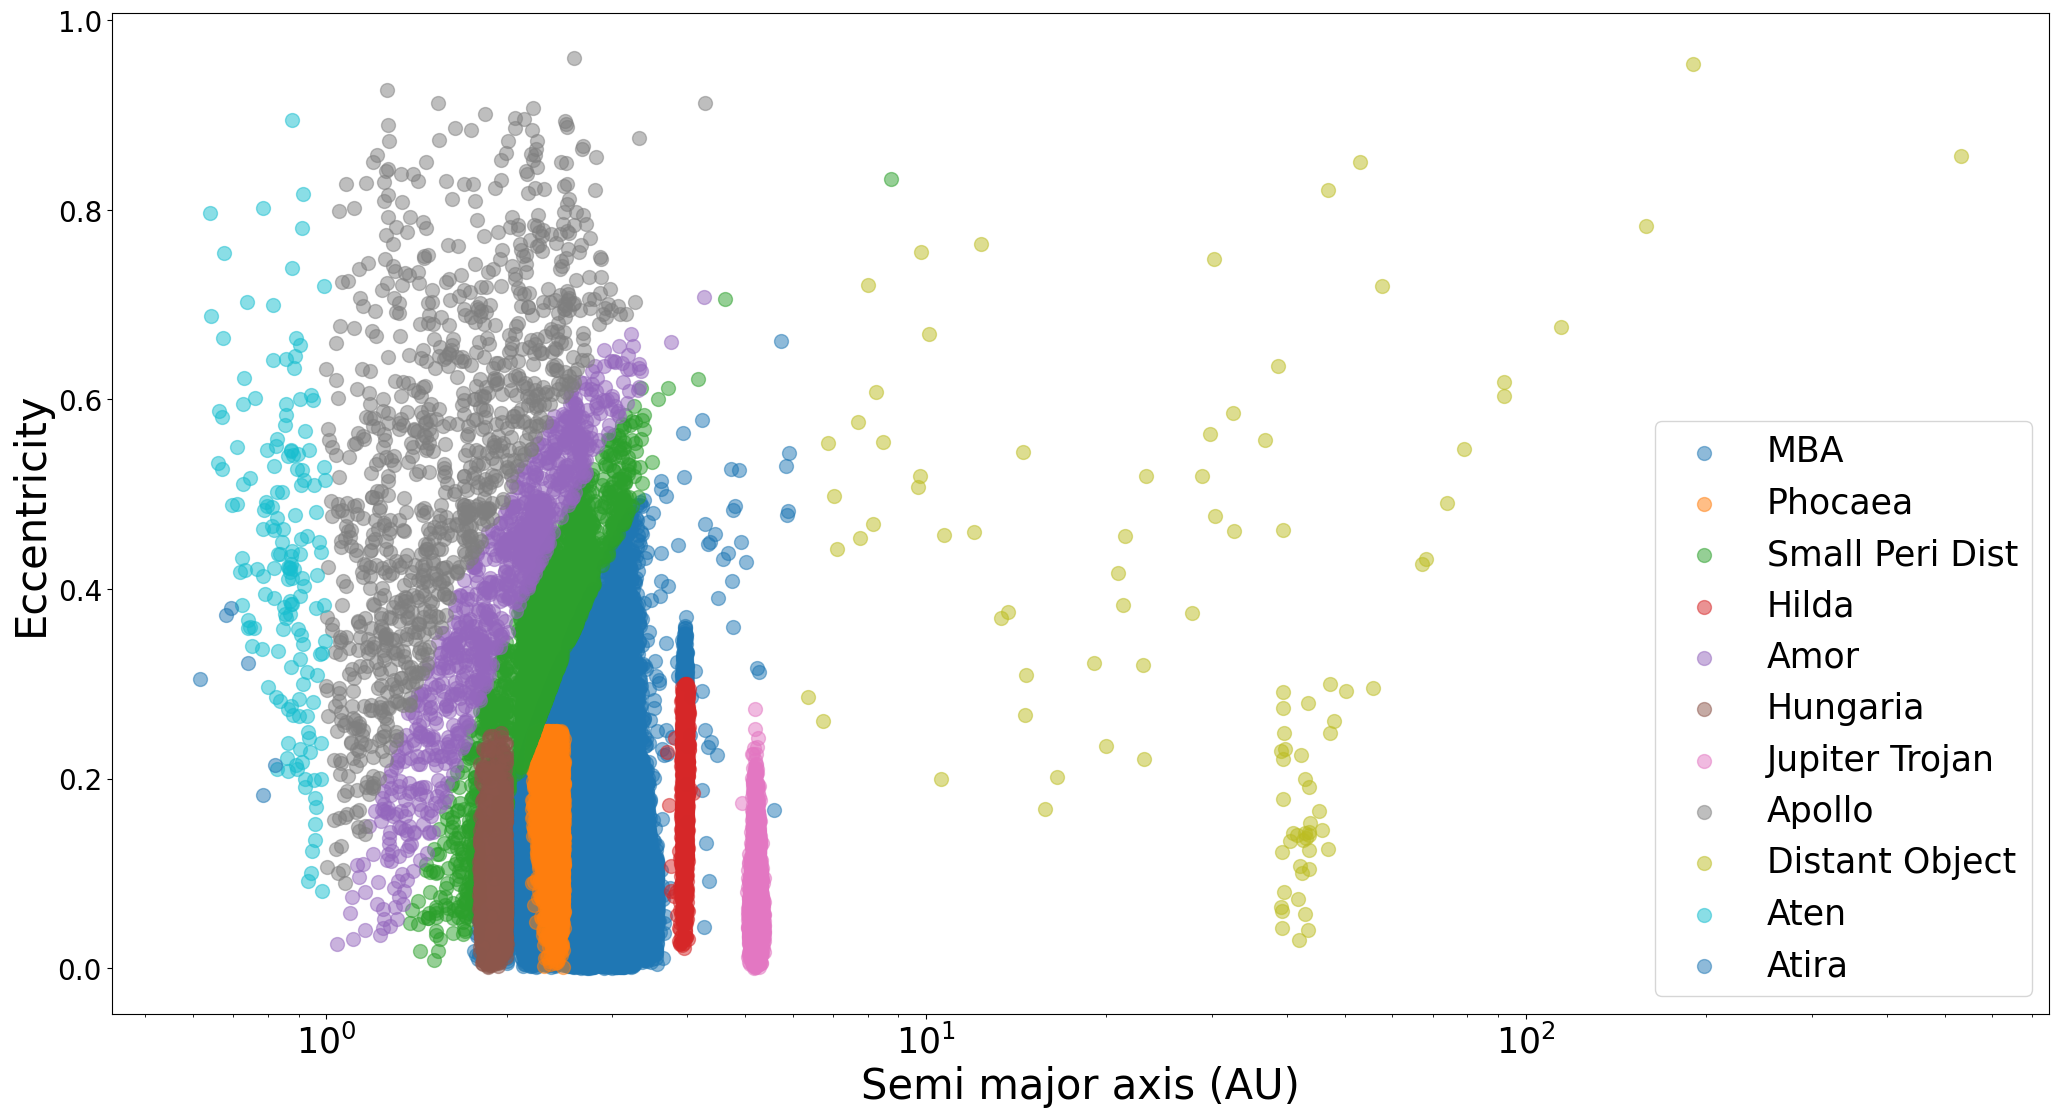

In [21]:
# MPC in Fink

es.plot_ast_distrib(mpc_in_fink, "e")

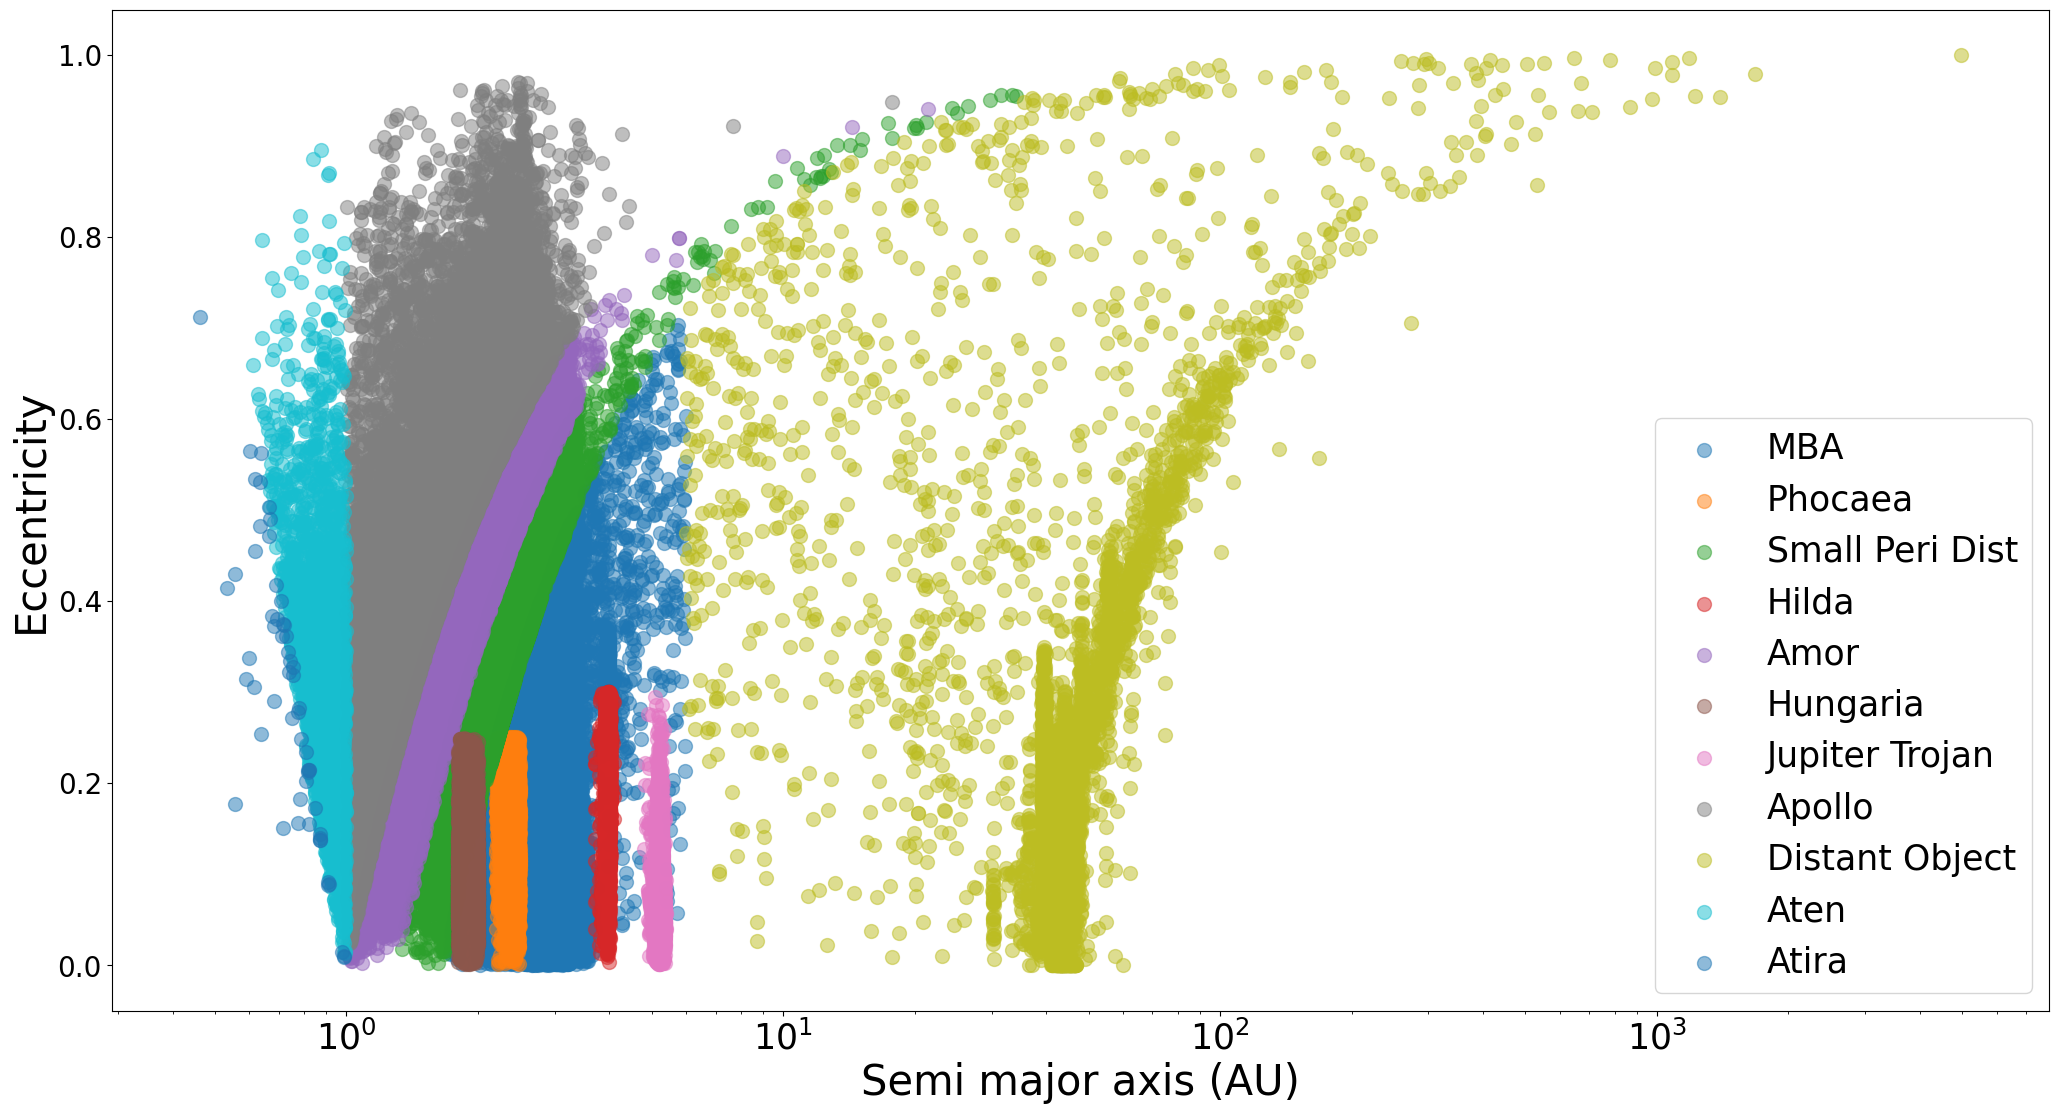

In [22]:
# All MPC

es.plot_ast_distrib(mpc_ast_data, "e")

## Inclination

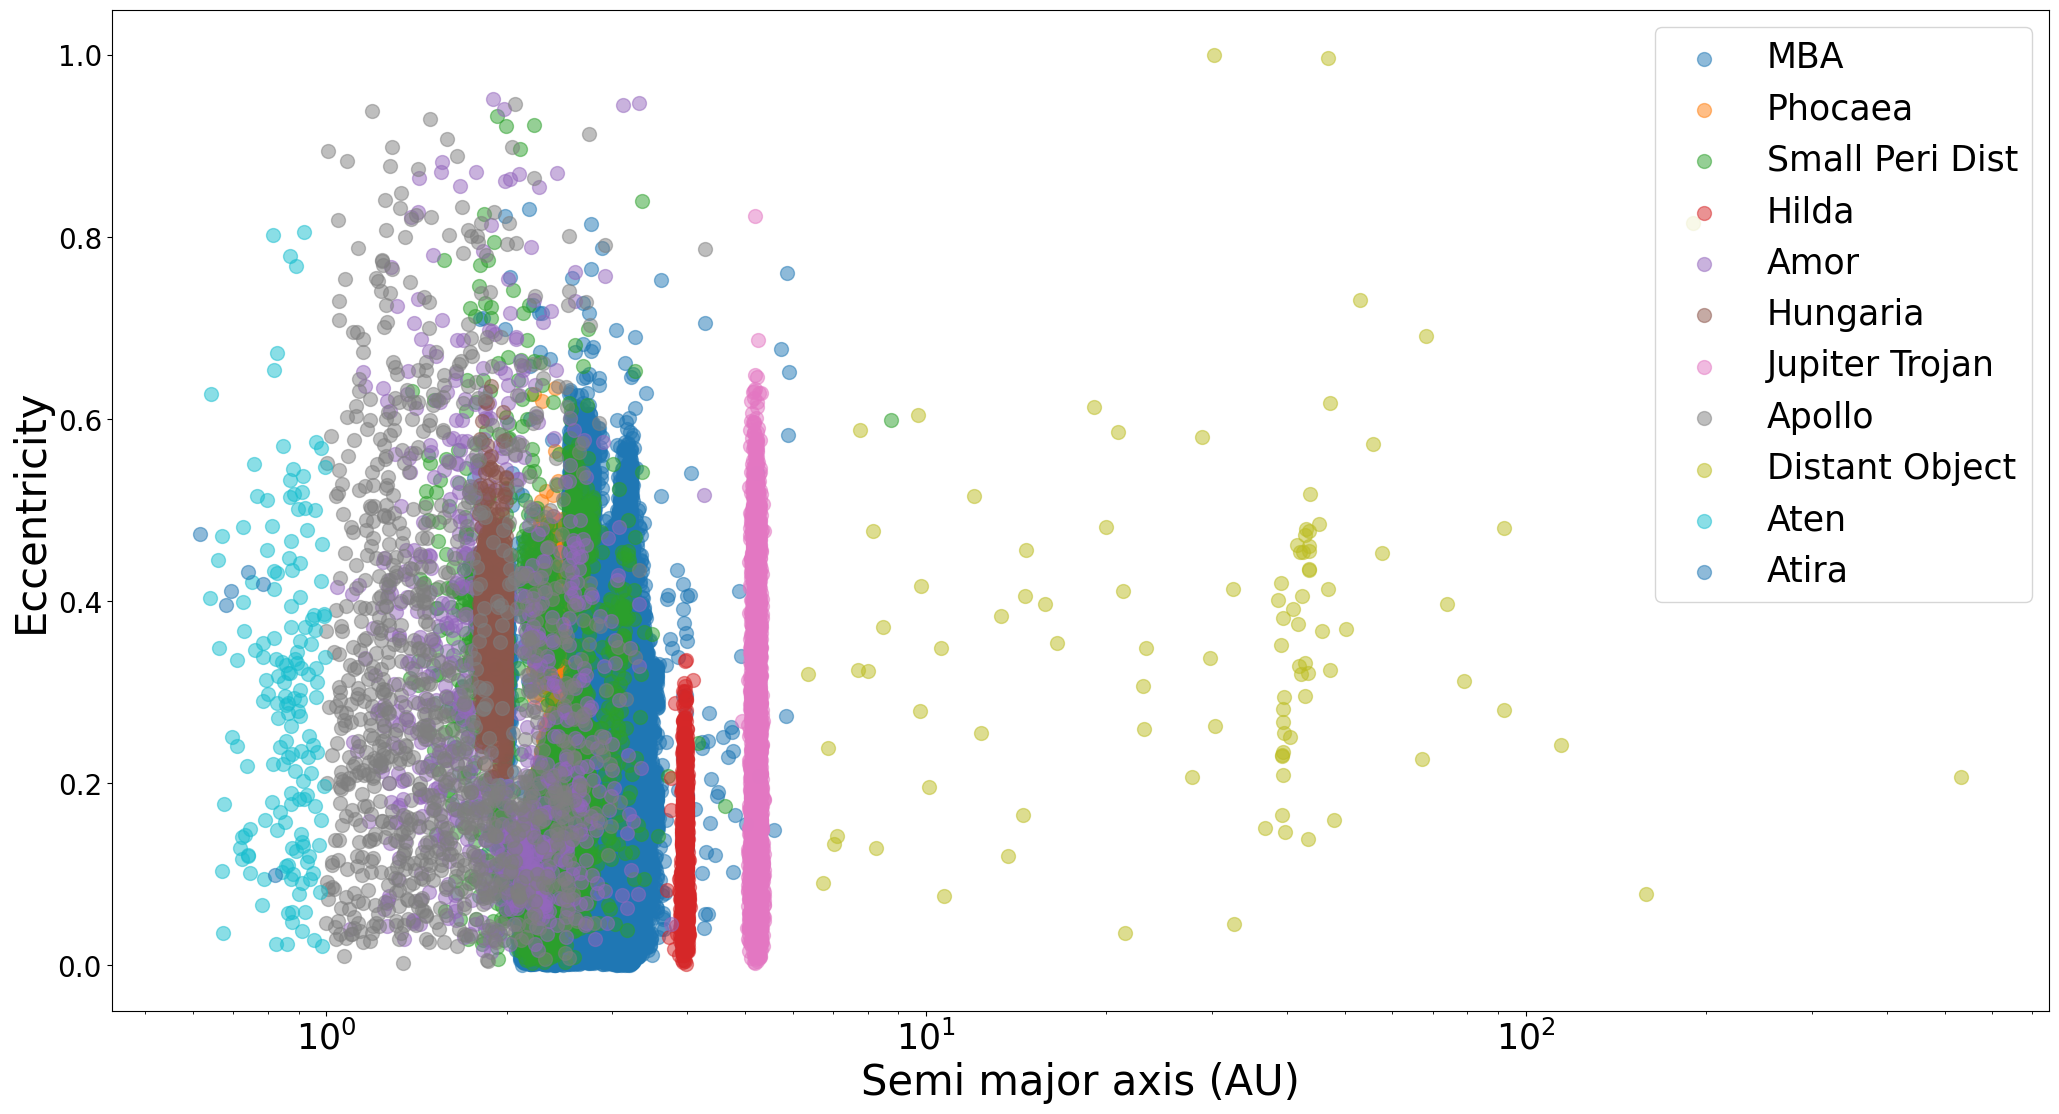

In [25]:
# MPC in Fink

es.plot_ast_distrib(mpc_in_fink, "i")

/home/roman/anaconda3/envs/fink_fat_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


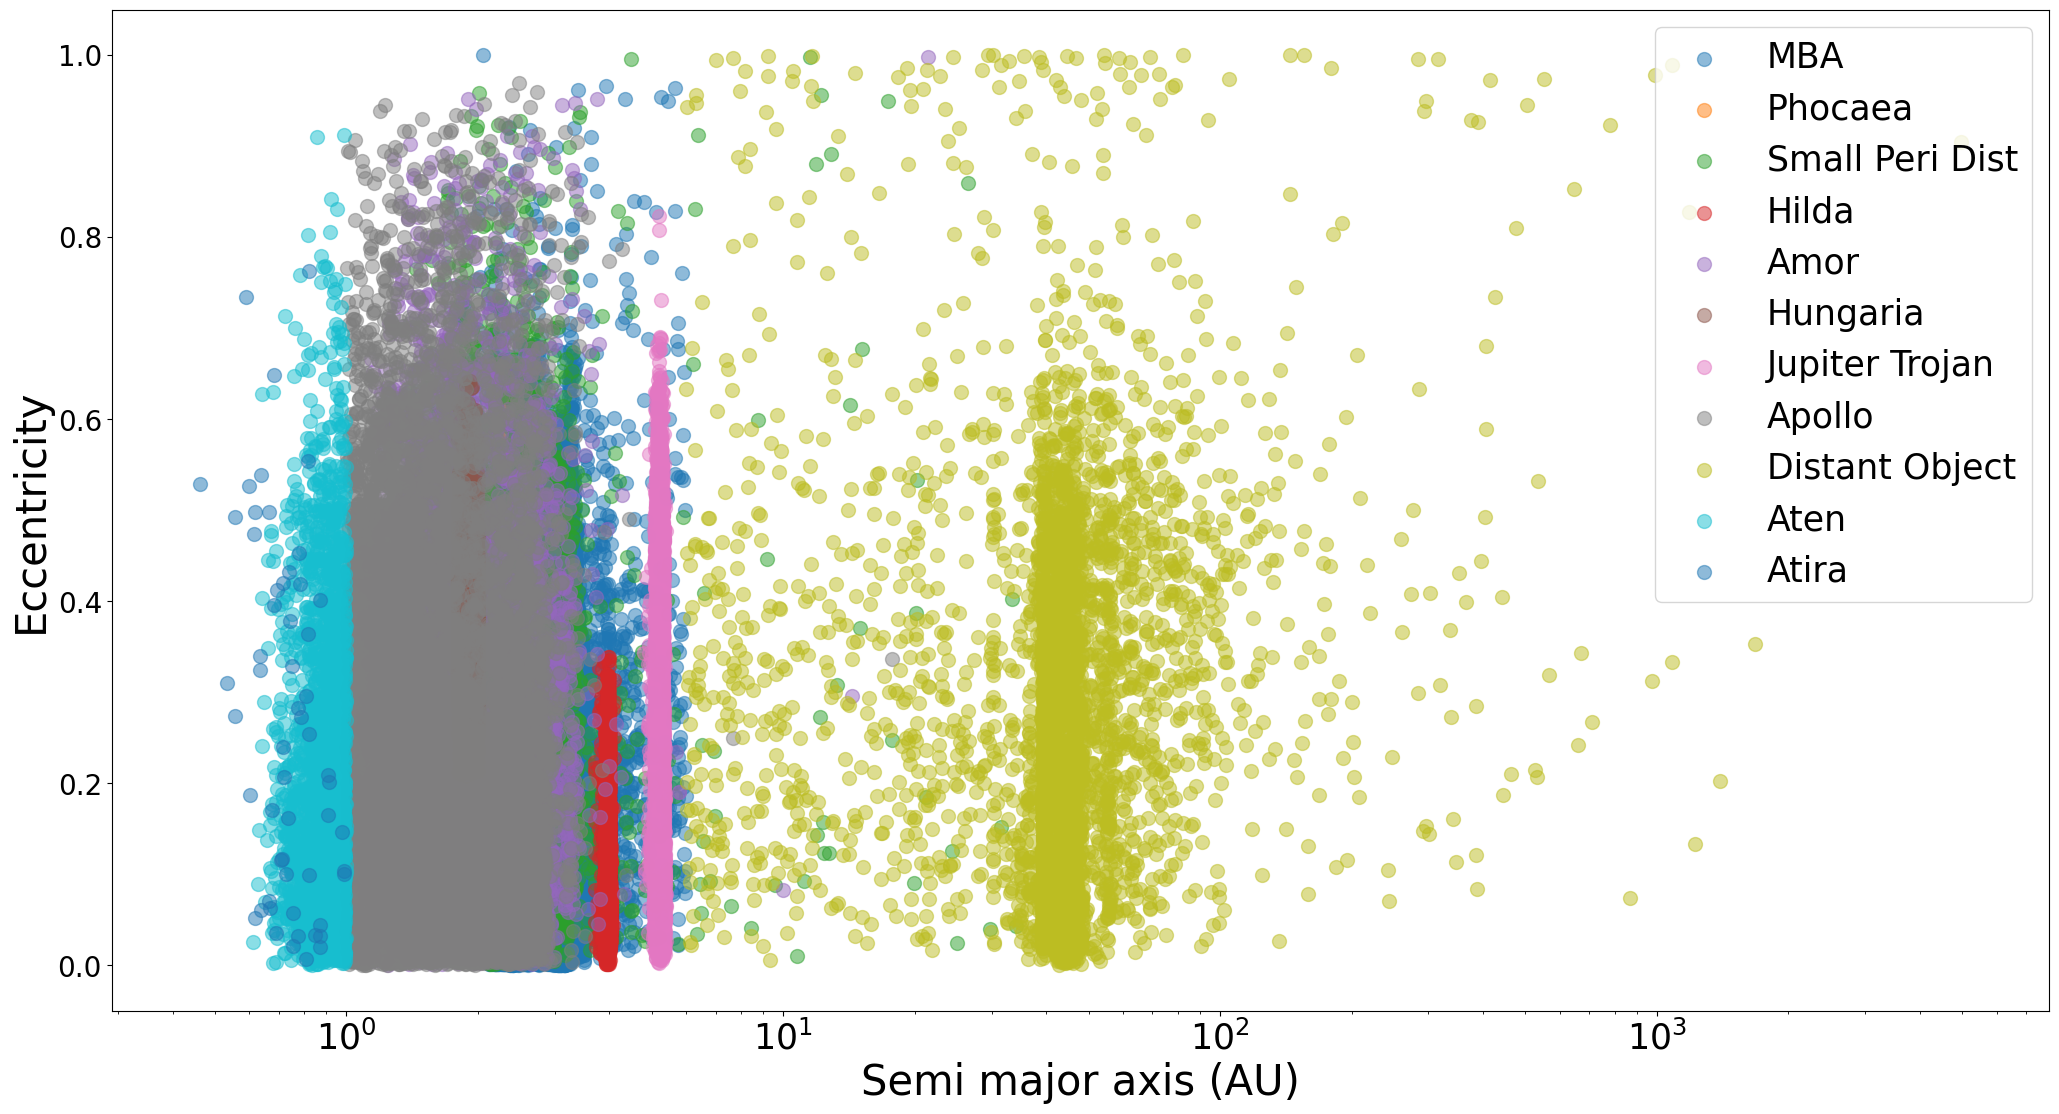

In [26]:
# All MPC

es.plot_ast_distrib(mpc_ast_data, "i")

#### Test

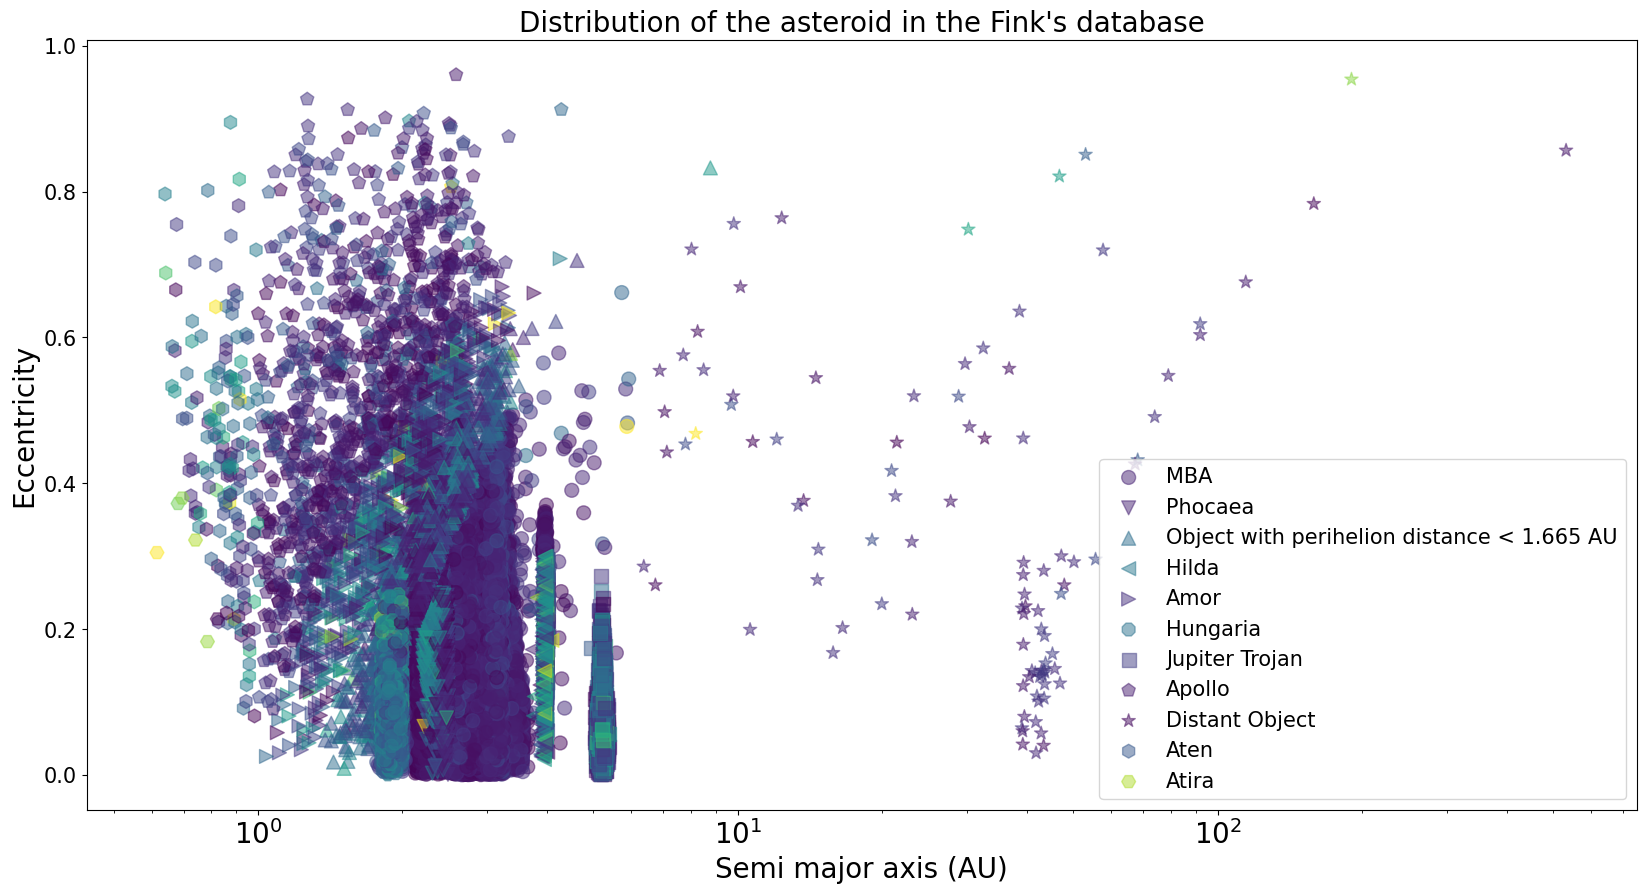

In [12]:
es.plot_ast_distrib_with_incl(mpc_in_fink)